<h1><center>PHYS 5306: Classical Dynamics</center></h1>

<h2><center>Joseph D. Romano<br>
    Texas Tech University<br>
    (Fall 2020)
    </center></h2>

<center><a href = "mailto: joseph.d.romano@ttu.edu">joseph.d.romano@ttu.edu</a></center>

## Load relevant packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle, json
import astropy.constants as c
import astropy.units as u
from mpmath import *
from sympy import *
import sympy
from sympy.solvers import solve
from sympy.plotting import plot

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True

# 1. Lagrangian mechanics

### 1) Write down the Lagrangian for a simple system in terms of generalized coordinates.

Example:

$$
L(q,\dot q, t) = \frac{1}{2}m\dot q^2 - \frac{1}{2}kq^2
$$

More generally:

$$
L= \frac{1}{2}\sum_{j,k}a_{jk}(q) \dot q_j\dot q_k - U(q_1,q_2,\cdots, q_n, t)
$$


### 2) Distinguish generalized coordinates from Cartesian coordinates.

Example: Double pendulum

<img src="img/double_pendulum.pdf" width="400">

Use the two angles $\phi_1$, $\phi_2$ for the generalized coordinates $q_1$, $q_2$, as opposed to the Cartesian coordinates $(x_1,y_1)$ and $(x_2,y_2)$ subject to constraints imposed by the pendulum rods.

### 3) Write down Lagrange's equations.

$$
\frac{d}{dt}\left(\frac{\partial L}{\partial \dot q_i}\right)
= \frac{\partial L}{\partial q_i}\,,
\qquad i=1,2,\cdots, n
$$

This is of the form

$$
\frac{dp_i}{dt} = F_i
\qquad i=1,2,\cdots, n
$$

where $p_i\equiv \partial L/\partial \dot q_i$ and $F_i = -\partial U/\partial q_i$, for the case where $T$ does not depend explicitly on $q$.

### 4) Derive Lagrange's equations starting from the action $S$.

### 5) Define the action in terms of the Lagrangian, and the conditions for the variation of the action.

Action:

$$
S[q] = \int_{t_1}^{t_2} dt\> L(q,\dot q, t) 
$$

Lagrange's equations are obtained from $\delta S=0$ for variations $\delta q_i$ that vanish at the end points $t_1$ and $t_2$.

### 6) Show that Lagrange's equations are unchanged if one adds a total time derivative $d f(q,t)/d t$ to $L$.

Define

$$
\bar{L}(q,\dot q,t) \equiv L(q,\dot q, t) + \frac{df(q,t)}{dt}
$$

Then

$$
\bar{S}[q] \equiv \int_{t_1}^{t_2} dt\> \bar{L}(q,\dot q, t) 
= S[q] + f(q,t)\big|_{t_2} - f(q,t)\big|_{t_1}
$$

From this we see that $\delta \bar{S}=\delta S$, since $\delta q|_{t_1}=0$ and $\delta q|_{t_2}=0$. 
So the EOMs from $L$ and $\bar{L}\equiv L + df(q,t)/dt$ are the same.

### 7) Include constraint forces in the Lagrangian formalism by introducing Lagrange multipliers and constraint functions.

### 8) Include non-conservative forces in the Lagrangian formalism by adding the generalized force $ F_i\equiv\sum_a \vec{F}_a\cdot \partial \vec r_a/\partial q_i $ to the RHS of Lagrange's equations.

### 9) Define and give examples of a *closed system*, *constant external field*, and *uniform field*.

**Closed system:** 

The potential $U$ is a function of only the relative position vectors $\vec r_1-\vec r_2$, etc. 

**Constant external field:** 

$$
U \equiv U(\vec r_1, \vec r_2, \cdots, \vec r_N)
$$ 

has no explicit time dependence

**Uniform field:**

$$
U = -\sum_a \vec F_a\cdot \vec r_a
$$

where $F$ is independent of $\vec r_1$, $\vec r_2$, etc., so that 

$$
-\frac{\partial U}{\partial\vec r_a}= \vec F_a
\quad{\rm has\ no\ position\ dependence}
$$



## Different effective potentials

Text(0.5, 1.0, 'Newtonian gravity')

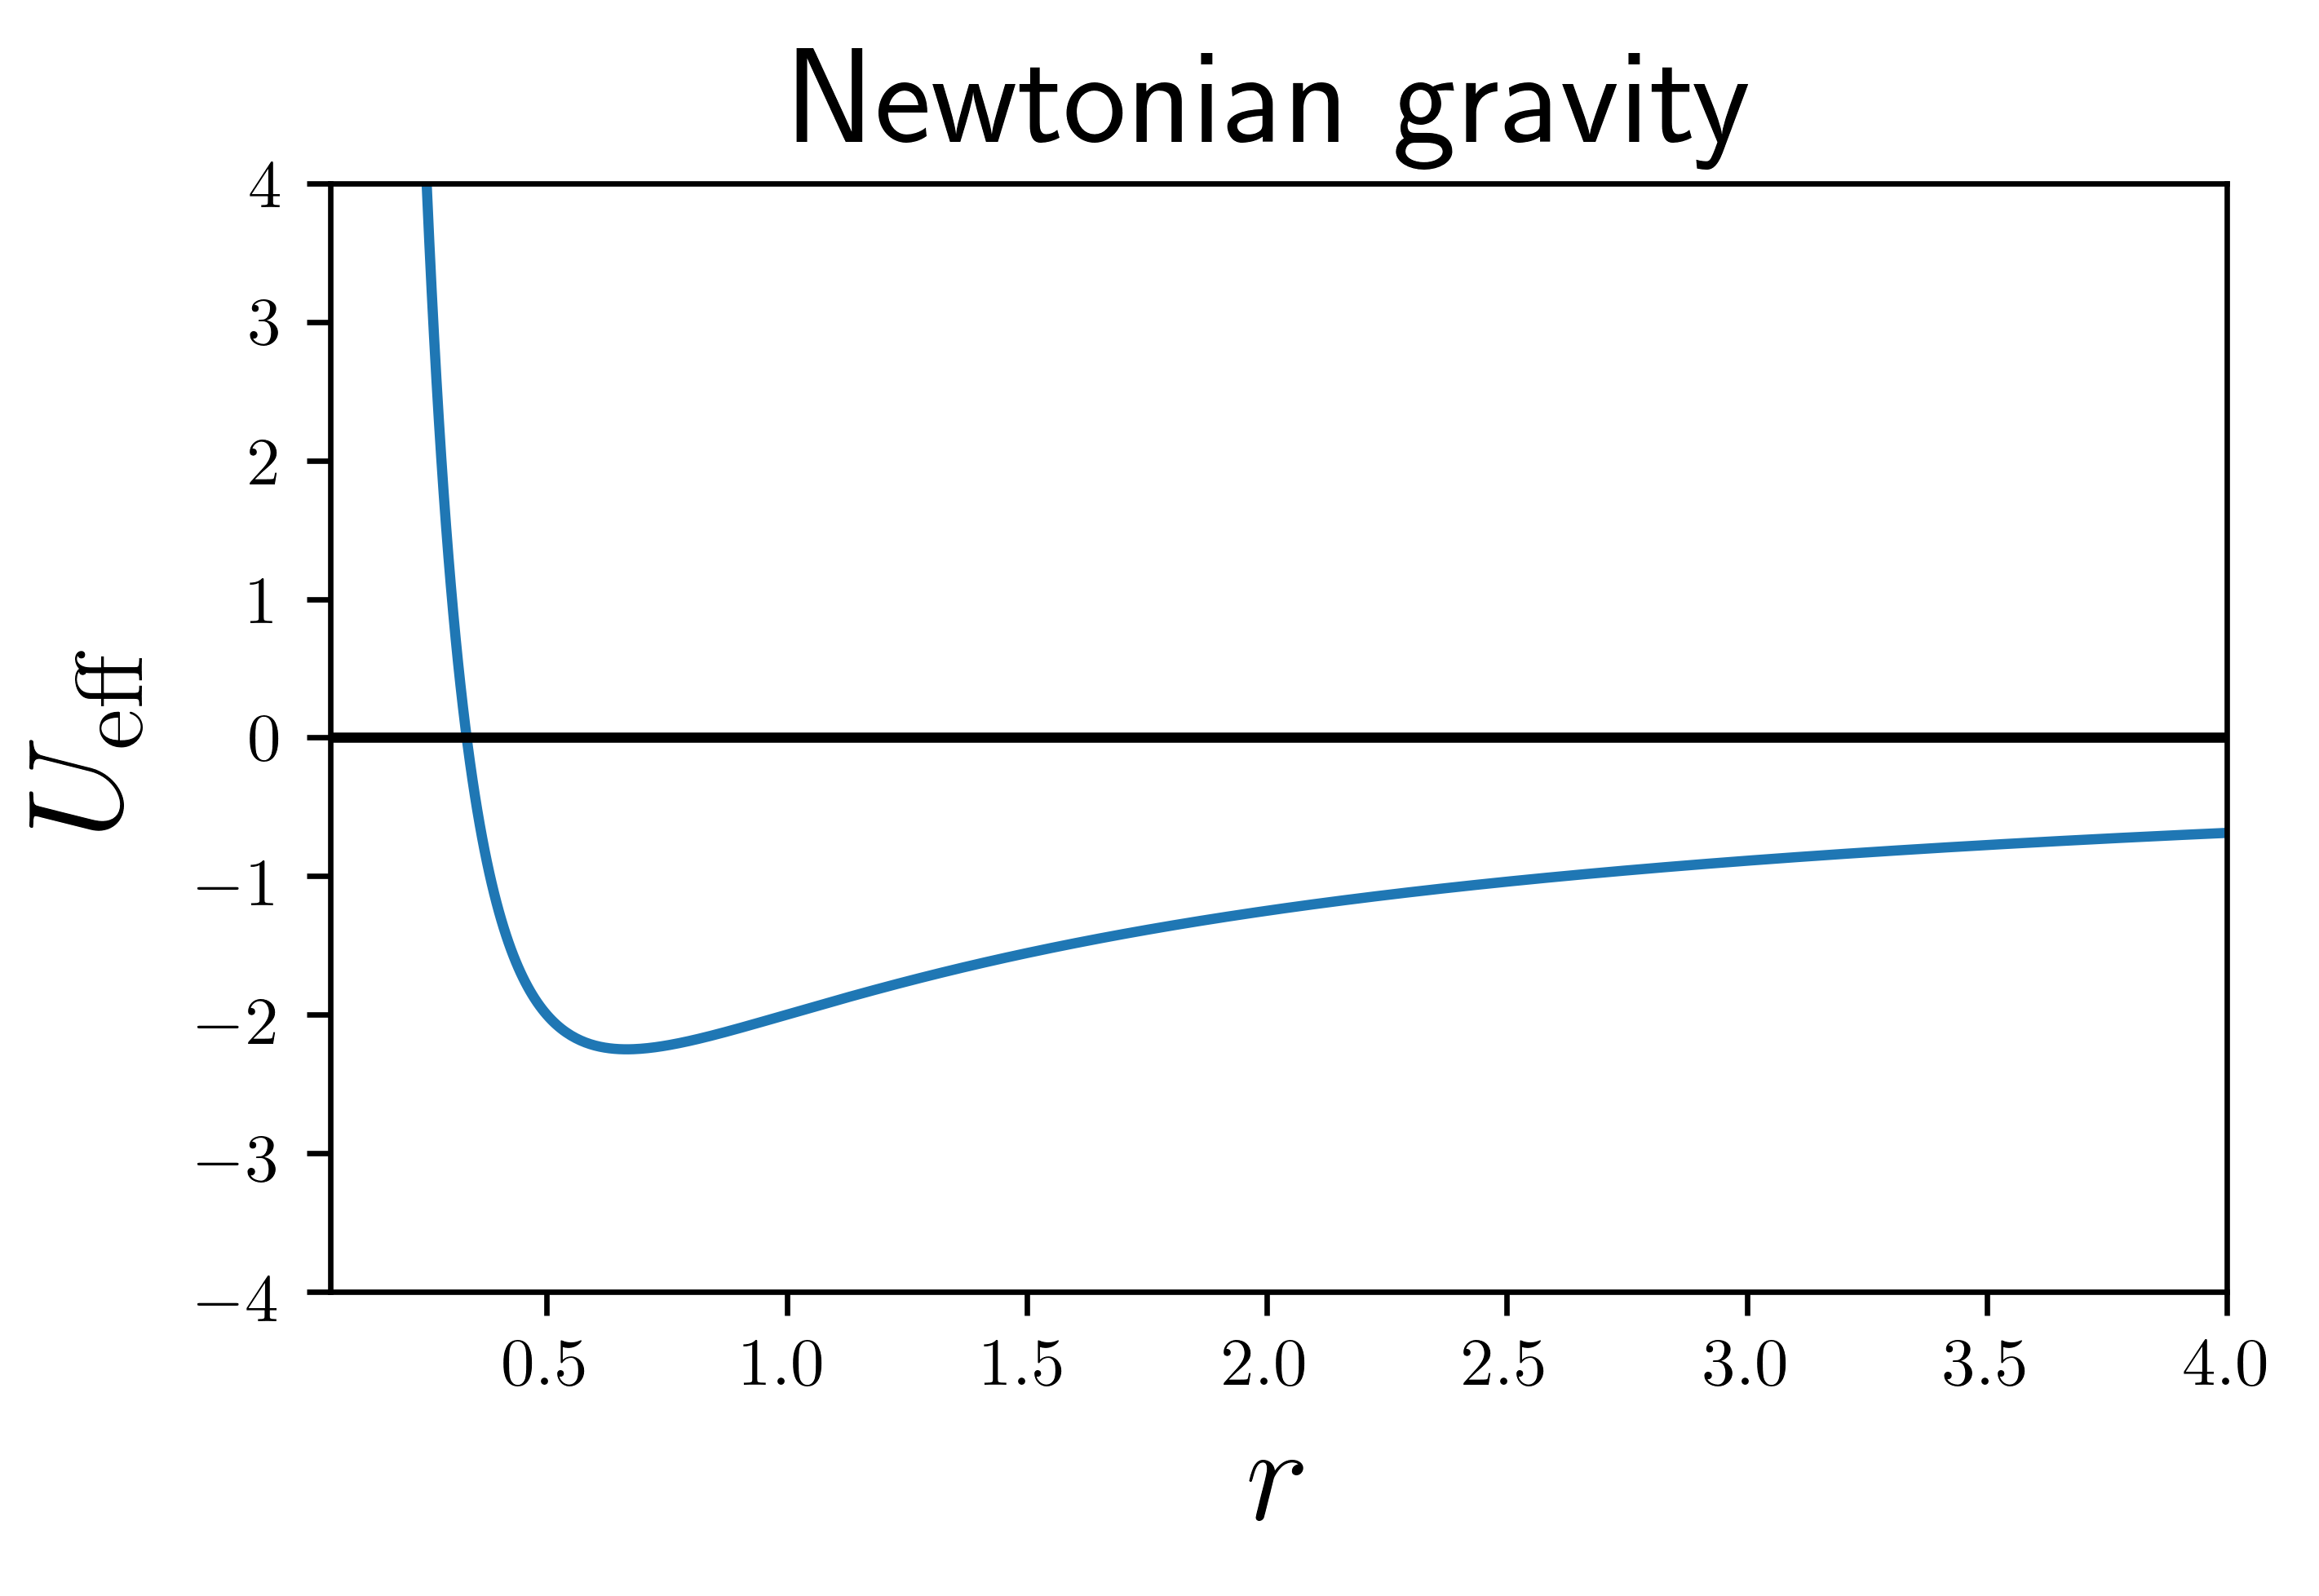

In [3]:
# kepler effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U = -3./r
Ueff = U + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.05, 4))
plt.ylim((-4,4))
plt.xlabel('$r$', fontsize='20')
plt.ylabel('$U_{\mathrm{eff}}$', fontsize='20')
plt.title('Newtonian gravity', fontsize='20')

Text(0.5, 1.0, '3d harmonic oscillator')

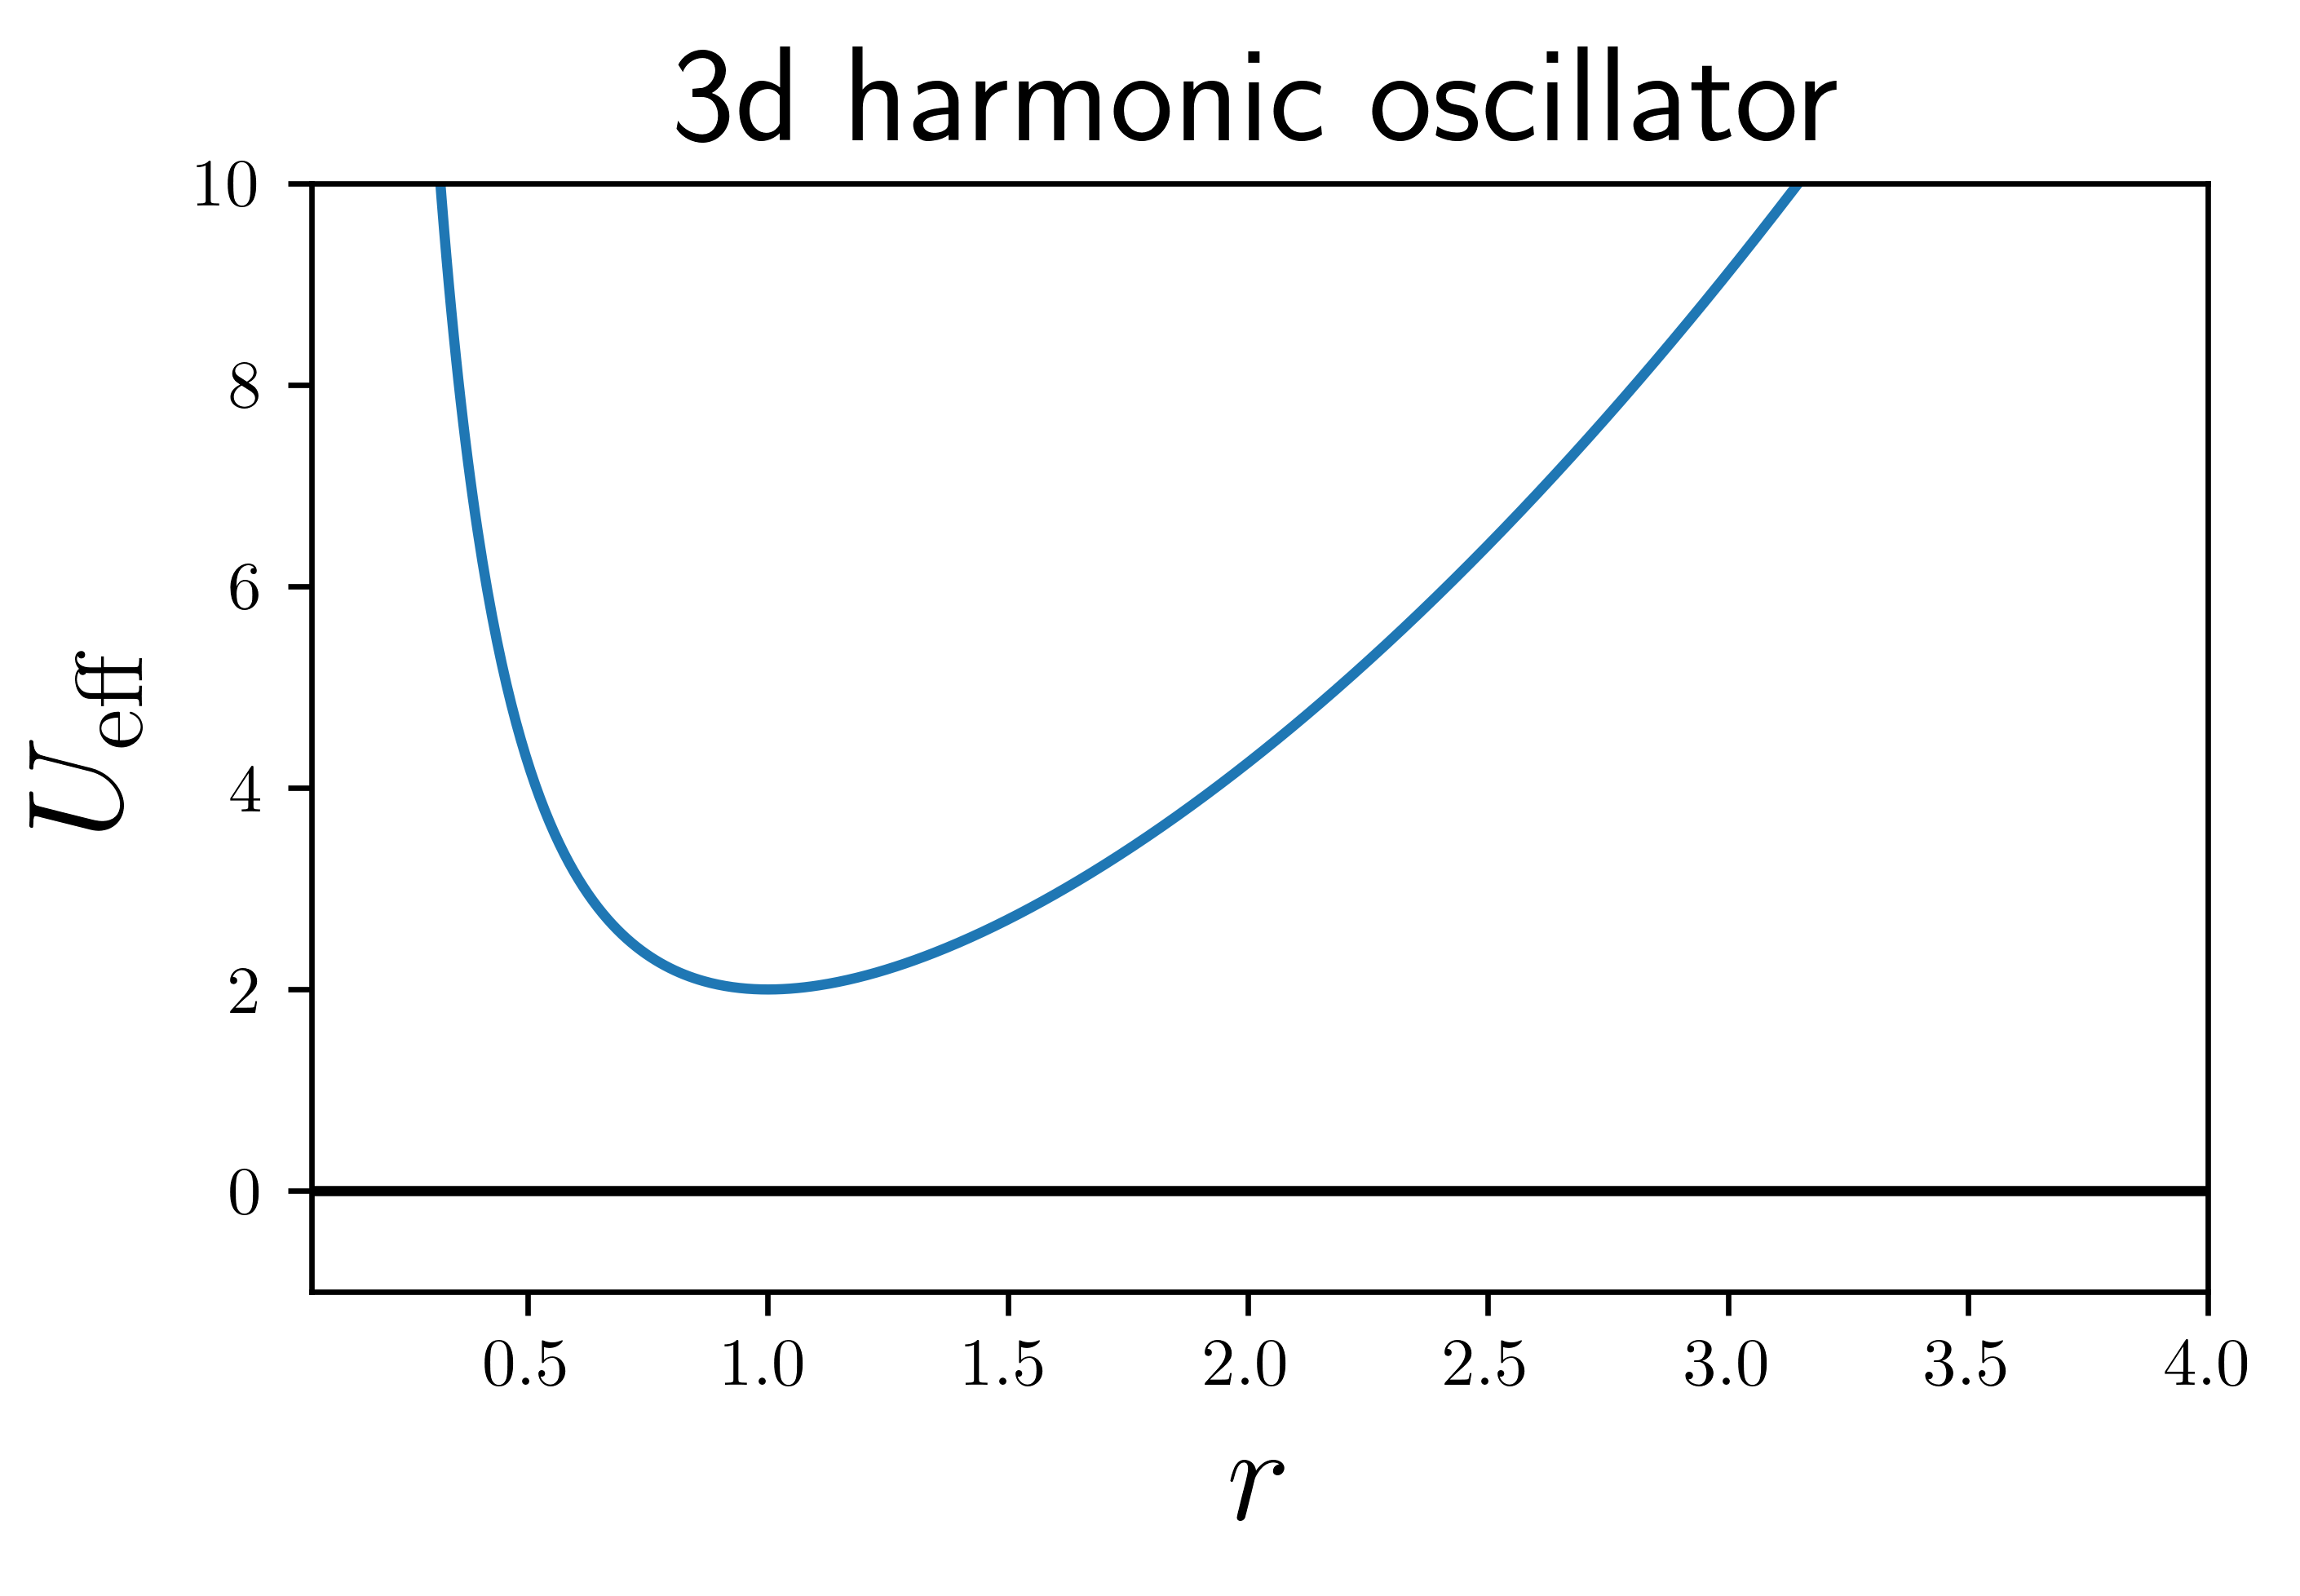

In [4]:
# 3d harmonic oscillator effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U = r**2
Ueff = U + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.05, 4))
plt.ylim((-1,10))
plt.xlabel('$r$', fontsize='20')
plt.ylabel('$U_{\mathrm{eff}}$', fontsize='20')
plt.title('3d harmonic oscillator', fontsize='20')

Text(0.5, 1.0, 'General relativity')

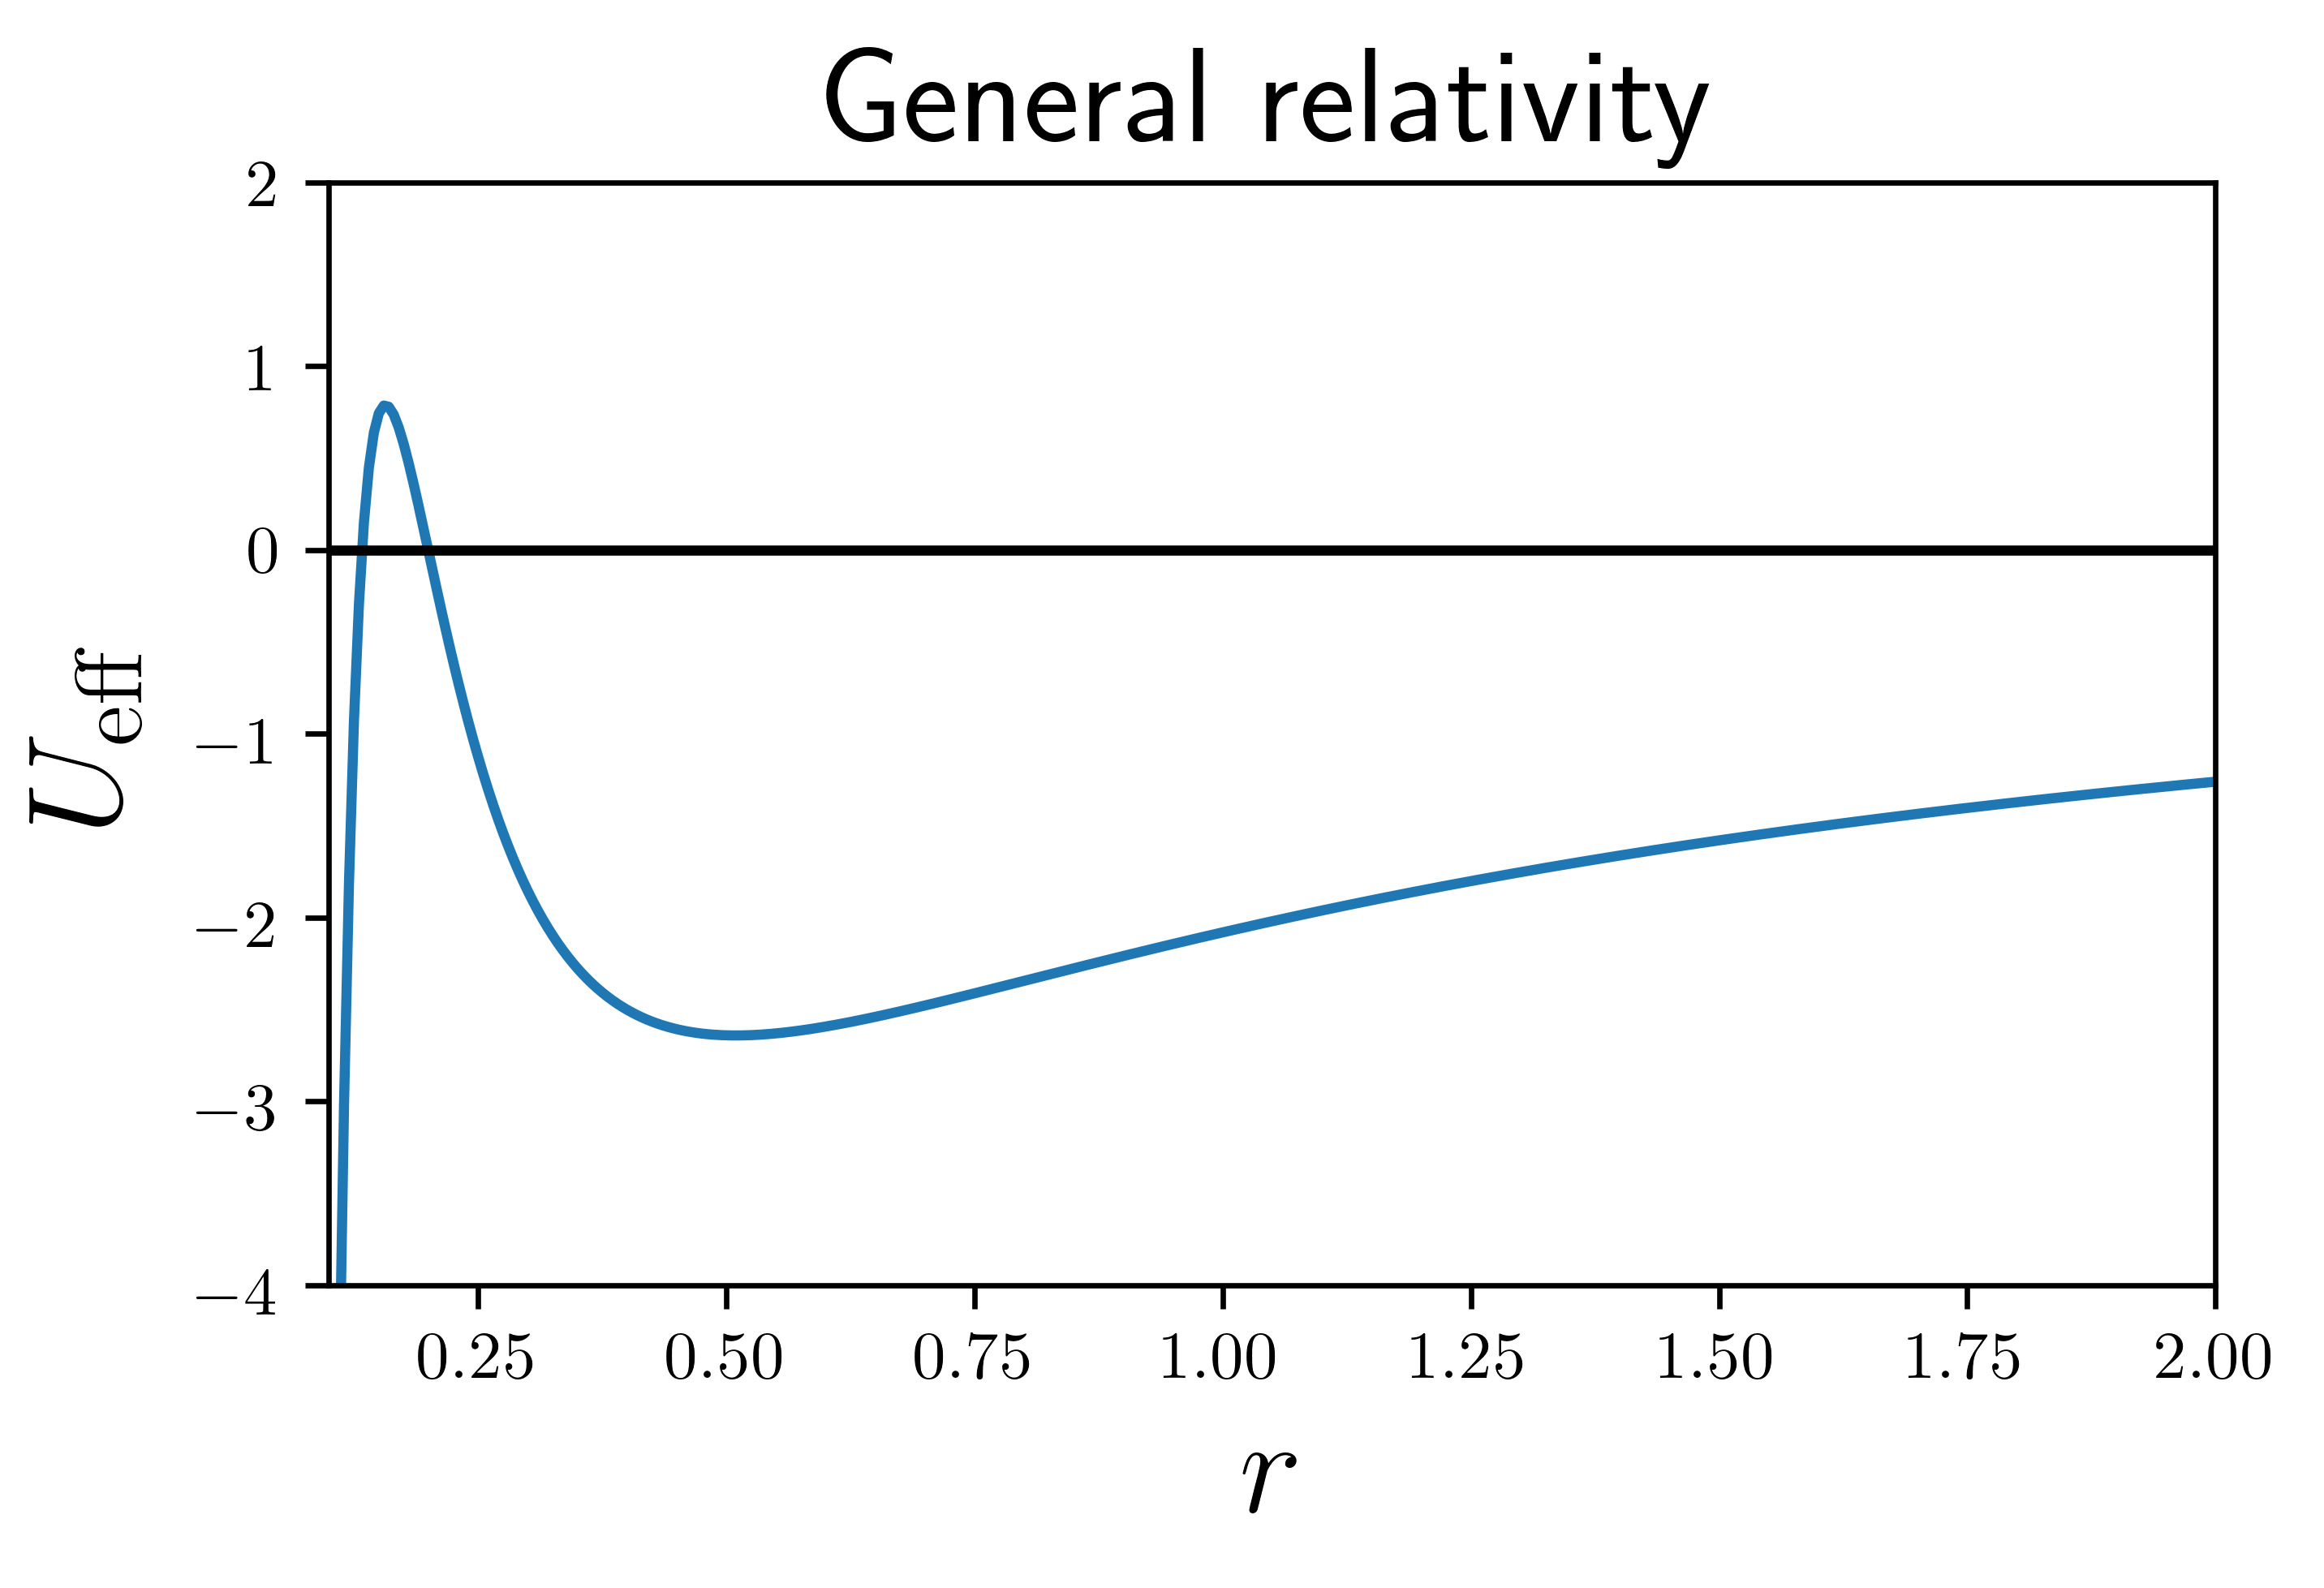

In [5]:
# GR effective potential
eps = 1e-4
r = np.linspace(eps, 5, 1000)

U1 = -3./r
U2 = -0.08/r**3
Ueff = U1 + U2 + 1./r**2

plt.figure()
plt.plot(r, Ueff)
plt.axhline(y=0, color='k')
plt.xlim((0.1, 2))
plt.ylim((-4,2))
plt.xlabel('$r$', fontsize='20')
plt.ylabel('$U_{\mathrm{eff}}$', fontsize='20')
plt.title('General relativity', fontsize='20')

In [6]:
# symbolic calculation (for future reference)
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)